In [78]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

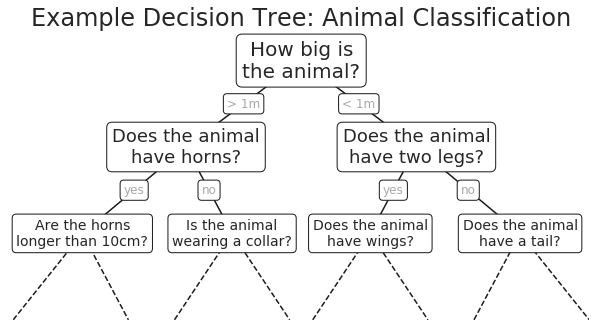

In [8]:
import fig_code
from fig_code import visualize_tree, plot_tree_interactive
fig_code.plot_example_decision_tree()


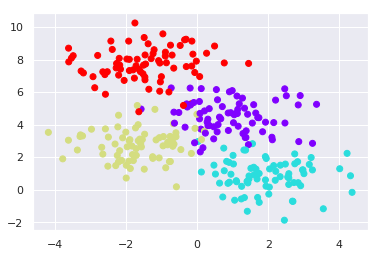

In [7]:
from sklearn.datasets import make_blobs

x , y = make_blobs(n_samples = 300,centers = 4,random_state = 0)

plt.scatter(x[:,0],x[:,1],c = y , cmap = 'rainbow')



Decision Tree

In [53]:
import sklearn
sklearn.__version__
sklearn?

In [57]:
cd ~/.local/lib/python3.6/site-packages/sklearn/metrics

/home/clive69/.local/lib/python3.6/site-packages/sklearn/metrics


In [58]:
ls

base.py                                         __pycache__/
classification.py                               ranking.py
cluster/                                        regression.py
__init__.py                                     scorer.py
pairwise_fast.cpython-36m-x86_64-linux-gnu.so*  setup.py
pairwise.py                                     tests/


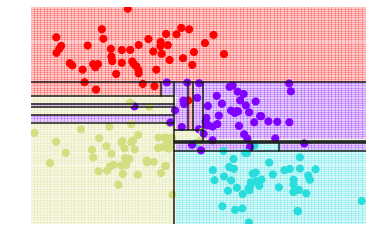

In [56]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

visualize_tree(clf,x[:200],y[0:200])

In [47]:
x[:,0].min()

-4.186076251218646

xlim (-4.286076251218645, 4.459184219116819)
ylim (-1.9749290964887134, 10.347913695185342)


(-1.9749290964887134, 10.347913695185342)

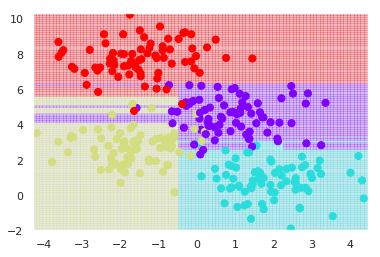

In [68]:
#plotting tree (scratch code)
clf.fit(x[:200],y[:200])

xlim = (x[:,0].min() - 0.1 , x[:,0].max() + 0.1)
print("xlim",xlim)
ylim = (x[:,1].min() - 0.1 , x[:,1].max() + 0.1)
print("ylim",ylim)


x_min, x_max = xlim
y_min, y_max = ylim
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='rainbow')
plt.clim(y.min(), y.max())

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='rainbow')
plt.clim(y.min(), y.max())
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)   

In [79]:
#testing iris data set

from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn import metrics


data = load_iris()
data.keys()

x = data.data[:,1:3]
y = data.target

print(x.shape)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2)

clf = DecisionTreeClassifier()

clf.fit(xtrain,ytrain)

pred = clf.predict(xtest)

print(pred)
print(ytest)

a = np.array(pred == ytest).astype('float32')

error = len(ytest) - np.sum(a)

accuracy = (len(ytest)-error)/len(ytest)

print('accuracy',np.round(accuracy*100),metrics.accuracy_score(pred,ytest))



formatter = plt.FuncFormatter(lambda i, *args: data.target_names[int(i)])
plt.colorbar(ticks=[0, 1, 2], format=formatter)
visualize_tree(clf, xtrain, ytrain, boundaries=False)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
visualize_tree(clf, xtest, ytest, boundaries=False)



(150, 2)
[0 1 1 2 2 0 0 2 1 1 2 0 0 0 0 0 1 2 0 2 2 1 2 2 2 2 2 1 1 2]
[0 1 1 2 2 0 0 2 1 1 2 0 0 0 0 0 1 2 0 1 2 1 2 2 2 1 2 1 1 1]
accuracy 90.0 0.9


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

<Figure size 432x288 with 0 Axes>

[1 1 0 0 2 2 2 0 2 1 2 0 1 0 1 2 0 0 2 1 0 2 0 2 0 1 1 1 0 2]
[1 1 0 0 2 2 2 0 2 1 2 0 1 0 1 2 0 0 2 1 0 2 0 2 0 1 1 1 0 1]


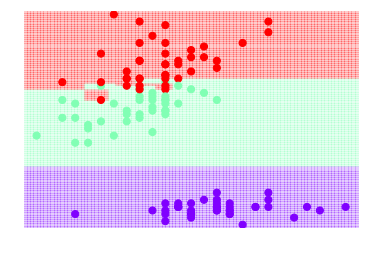

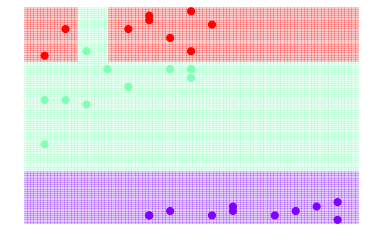

In [116]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10)

forest.fit(xtrain,ytrain)

pred = forest.predict(xtest)



print(pred)
print(ytest)

a = np.array(pred == ytest).astype('float32')

error = len(ytest) - np.sum(a)

accuracy = (len(ytest)-error)/len(ytest)

np.round(accuracy*100)


visualize_tree(clf, xtrain, ytrain, boundaries=False)
visualize_tree(clf, xtest, ytest, boundaries=False)



<ErrorbarContainer object of 3 artists>

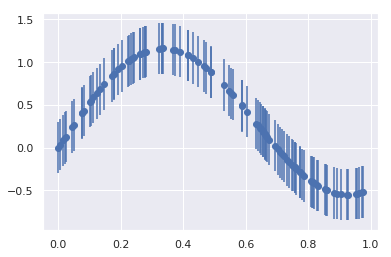

In [132]:
#regression trees

def get_data(n):
    
    x = np.random.rand(n)
    y = np.sin(0.5 * x) + np.sin(5 * x)     
    return x,y
    
x,y = get_data(100)
# plt.scatter(x,y)
plt.errorbar(x,y,0.3,fmt='o')


(100, 1) (100,)
(100,) (100,)


<ErrorbarContainer object of 3 artists>

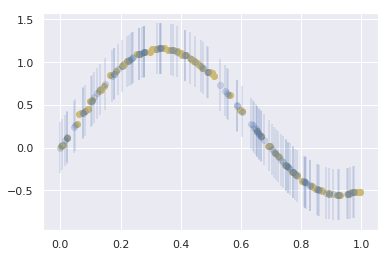

In [159]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(100)
print(x.reshape(-1,1).shape,y.shape)
reg.fit(x.reshape(-1,1),y)

xtest,ytest = get_data(100)

pred = reg.predict(xtest.reshape(-1,1))
print(pred.shape,xtest.shape)
plt.scatter(xtest,pred,c = 'y')
plt.errorbar(x,y,0.3,fmt='o',alpha = 0.2)
# plt.errorbar(xtest,ytest,'-k')


In [194]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
data = load_boston()
print(data.keys())

x = data.data
y = data.target

print(x.shape)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3)

from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor()
clf.fit(xtrain,ytrain)

pred = clf.predict(xtest)

print(pred[0:5])
print(ytest[:5])

true = sum(ytest)
error = sum(abs(pred - ytest))

accuracy = (true - error)/true


print('accuracy',np.round(accuracy*100))


dict_keys(['data', 'target', 'feature_names', 'DESCR'])
(506, 13)
[23.2 24.6 26.6 19.8 18.3]
[21.7 25.  26.2 21.2 21.2]
accuracy 86.0


[21.586 23.74  26.928 20.348 19.281]
[21.7 25.  26.2 21.2 21.2]
accuracy 90.0
(152, 13) (152,)


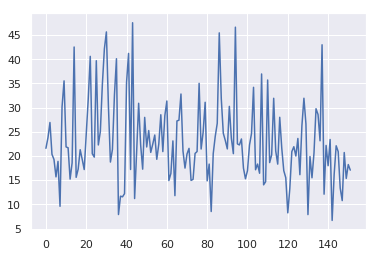

In [199]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(100)

clf.fit(xtrain,ytrain)

pred = clf.predict(xtest)


print(pred[0:5])
print(ytest[:5])

true = sum(ytest)
error = sum(abs(pred - ytest))

accuracy = (true - error)/true


print('accuracy',np.round(accuracy*100))

print(xtest.squeeze().shape,pred.shape)
plt.plot(pred)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X,Y = make_blob()

model = RandomForestRegressor()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)


plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
(1797, 64)


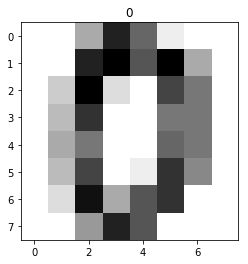

For unormalized data : accuracy:0.8417508417508418,time:0.04495382308959961sec
For normalized data : accuracy:0.8468013468013468,time:0.03052043914794922


In [24]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import time


data = load_digits()
print(data.keys())

x = data.data
y = data.target


print(x.shape)
plt.imshow(x[0].reshape(8,8),cmap = 'binary')
plt.title(y[0])
plt.show()

#splitting data into train and test sets
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.33)



#feeding data in decision tree (without normalising)
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

s = time.time()
clf.fit(xtrain,ytrain)
t1 = time.time() - s


pred = clf.predict(xtest)


############### Decsion Tree with normalized data

clf_norm = DecisionTreeClassifier()

xtrain = xtrain/255.
xtest = xtest/255.

s = time.time()
clf_norm.fit(xtrain,ytrain)
t2 = time.time() - s

pred_norm  = clf_norm.predict(xtest)

#claculating accuracy

from sklearn import metrics

a1 = metrics.accuracy_score(pred,ytest)
a2 = metrics.accuracy_score(pred_norm,ytest)

print('For unormalized data : accuracy:{},time:{}sec'.format(a1,t1))


print('For normalized data : accuracy:{},time:{}'.format(a2,t2))


dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
(1797, 64)


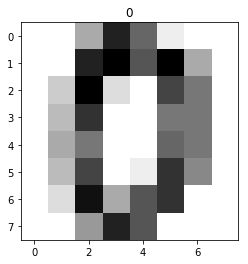

For unormalized data : accuracy:0.9747474747474747,time:0.7301790714263916sec
For normalized data : accuracy:0.968013468013468,time:0.6486191749572754
time saved by normalizing: 0.08155989646911621


In [46]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import time


data = load_digits()
print(data.keys())

x = data.data
y = data.target


print(x.shape)
plt.imshow(x[0].reshape(8,8),cmap = 'binary')
plt.title(y[0])
plt.show()

#splitting data into train and test sets
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.33)



#feeding data in decision tree (without normalising)
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(100)

s = time.time()
clf.fit(xtrain,ytrain)
t1 = time.time() - s


pred = clf.predict(xtest)


############### Decsion Tree with normalized data

clf_norm = RandomForestClassifier(100)

xtrain = xtrain/255.
xtest = xtest/255.

s = time.time()
clf_norm.fit(xtrain,ytrain)
t2 = time.time() - s

pred_norm  = clf_norm.predict(xtest)

#claculating accuracy

from sklearn import metrics

a1 = metrics.accuracy_score(pred,ytest)
a2 = metrics.accuracy_score(pred_norm,ytest)

print('For unormalized data : accuracy:{},time:{}sec'.format(a1,t1))


print('For normalized data : accuracy:{},time:{}'.format(a2,t2))


print("time saved by normalizing:",abs(t1-t2))


0.06363636363636363
score 0.7448547549795663
score2 0.7493096719561135


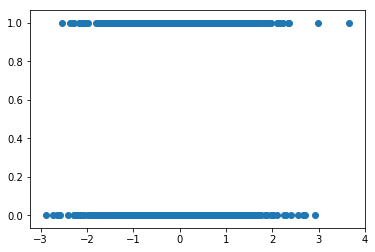

In [76]:
from sklearn.datasets import make_classification


x,y = make_classification(n_samples = 1000)

plt.scatter(x[:,1],y)

#splitting data
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.33)

#using decsion tree for regression
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor()


reg.fit(xtrain,ytrain)

pred = reg.predict(xtest)


# approx_accuracy = sum(abs(pred - ytest))/sum(ytest)
# print('approx:',approx_accuracy)


#importing evaluation metrices
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,explained_variance_score

mse = mean_squared_error(pred,ytest)
print(mse)
r2_score = r2_score(pred,ytest)
print('score',r2_score)

score = explained_variance_score(pred,ytest)
print('score2',score)






In [ ]:
'''
"mean_absolute_error",
"mean_squared_error",
"mean_squared_log_error",
"median_absolute_error",
"r2_score",
"explained_variance_score"
'''